<a href="https://colab.research.google.com/github/Arona416/-_2_-/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_3_%D0%91%D0%B0%D1%80%D1%80%D0%B8_%D0%90%D1%80%D0%BE%D0%BD%D0%B0_1_%D0%98%D0%90%D0%98%D0%A2_103%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

1. Реализовать задачу классификации Решающими деревьями и Ансамблевыми методами.
2. Для решения задачи классификации подобрать датасет самостоятельно.

Решающее дерево - это алгоритм, который принимает решения по принципу "задавайте вопросы до тех пор, пока не найдете ответ".

Ансамблевые методы - это когда мы объединяем несколько "слабых" моделей в одну "сильную".

# Пример реализации классификации алгоритмами Деревья решений и Ансамблевыми методами

## Набор данных

Прогнозирование качества вина на основе физико-химических показателей

## Набор данных Pima Indians Diabetes представляет собой CSV-файл с 768 медицинскими наблюдениями, используемыми для бинарной классификации в машинном обучении. Его главная цель — предсказать, есть ли у пациента риск развития диабета (обозначается переменной outcome равной 1) или нет (значение 0), на основе восьми физиологических и медицинских характеристик, таких как возраст, количество беременностей, концентрация глюкозы, кровяное давление, индекс массы тела (ИМТ) и маркеры вроде инсулина. Эти данные, собранные среди женщин индейского племени Пима, служат стандартным учебным примером для тренировки и оценки алгоритмов прогнозирования медицинских рисков, но требуют внимательной предобработки, поскольку пропущенные значения закодированы нулями в числовых полях, таких как глюкоза или давление.

## 1-Import библиотек


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    make_scorer,
    f1_score,
    precision_score,
    recall_score
)
from sklearn import tree


## 2-Считываем файл в DataFrame и выводим


In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]

df = pd.read_csv(url, names=columns)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 1. Chargement des données
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
noms_colonnes = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness',
                 'insulin', 'bmi', 'diabetes_pedigree', 'age', 'outcome']
df = pd.read_csv(url, header=None, names=noms_colonnes)

# 2. Aperçu rapide
print("=== PREMIÈRES LIGNES ===")
print(df.head())
print(f"\n=== FORMES : {df.shape} (lignes, colonnes) ===")
print(f"\n=== DISTRIBUTION DE LA CIBLE (outcome) ===")
print(df['outcome'].value_counts())
print(f"\n=== INFORMATIONS GÉNÉRALES ===")
print(df.info())
print(f"\n=== STATISTIQUES DESCRIPTIVES ===")
print(df.describe())

=== PREMIÈRES LIGNES ===
   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   diabetes_pedigree  age  outcome  
0              0.627   50        1  
1              0.351   31        0  
2              0.672   32        1  
3              0.167   21        0  
4              2.288   33        1  

=== FORMES : (768, 9) (lignes, colonnes) ===

=== DISTRIBUTION DE LA CIBLE (outcome) ===
outcome
0    500
1    268
Name: count, dtype: int64

=== INFORMATIONS GÉNÉRALES ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Nu

## Классификация это предсказание категории объекта

## Деревья решений
Один алгоритм, который строит последовательность правил


In [ ]:
from sklearn.tree import DecisionTreeClassifier #Импорт классификатора решающего дерева

from sklearn.metrics import classification_report #Импорт отчета классификации
from sklearn.model_selection import StratifiedKFold #Импорт стратифицированной кросс-валидации
from sklearn.model_selection import cross_validate #Импорт функции кросс-валидации

# from sklearn.metrics import confusion_matrix #Импорт матрицы ошибок

from sklearn.metrics import accuracy_score as acc #Импорт метрики точности
from sklearn.metrics import f1_score as f1 #Импорт метрики F1
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

# 3-Подготовка данных для обучения
Разделение на признаки и целевую переменную.


In [ ]:
X = df.drop(columns=["Outcome"]).values      # Признаки
y = df["Outcome"].values                     # Целевая переменная
features_names = df.drop(columns=["Outcome"]).columns


🔀 4. Разделение на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


📊 5. Кастомные метрики

In [ ]:
f1_weighted = make_scorer(f1_score, average='weighted', zero_division=0)
precision_weighted = make_scorer(precision_score, average='weighted', zero_division=0)
recall_weighted = make_scorer(recall_score, average='weighted', zero_division=0)


 6. Decision Tree — Обучение модели

In [ ]:
max_depth = 8
min_samples_split = 15
max_leaf_nodes = 25

DT_clf = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    max_leaf_nodes=max_leaf_nodes,
    random_state=42
)

DT_clf.fit(X_train, y_train)
y_predict = DT_clf.predict(X_test)


 7. Кросс-валидация (Decision Tree)


In [ ]:
scoring = {
    'ACC (Точность)': 'accuracy',
    'F1 (F1-мера)': f1_weighted,
    'Precision (Точность)': precision_weighted,
    'Recall (Полнота)': recall_weighted
}

scores = cross_validate(
    DT_clf,
    X_train,
    y_train,
    scoring=scoring,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)

DF_cv = pd.DataFrame(scores)
display(DF_cv)

print("Средние метрики:")
print(DF_cv.mean()[2:])


,fit_time,score_time,test_ACC (Точность),test_F1 (F1-мера),test_Precision (Точность),test_Recall (Полнота)
0,0.003602,0.007201,0.703704,0.697094,0.695023,0.703704
1,0.002945,0.008107,0.675926,0.681063,0.691770,0.675926
2,0.003083,0.006943,0.728972,0.723825,0.722040,0.728972
3,0.003298,0.007517,0.757009,0.739705,0.754030,0.757009
4,0.002998,0.006613,0.719626,0.717707,0.716303,0.719626


Средние метрики:
test_ACC (Точность)          0.717047
test_F1 (F1-мера)            0.711879
test_Precision (Точность)    0.715833
test_Recall (Полнота)        0.717047
dtype: float64


🧾 8. Отчет классификации (Decision Tree)

In [ ]:
print(classification_report(y_test, y_predict, zero_division=0))


              precision    recall  f1-score   support

           0       0.78      0.92      0.85       150
           1       0.78      0.53      0.63        81

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



 9. Визуализация Decision Tree

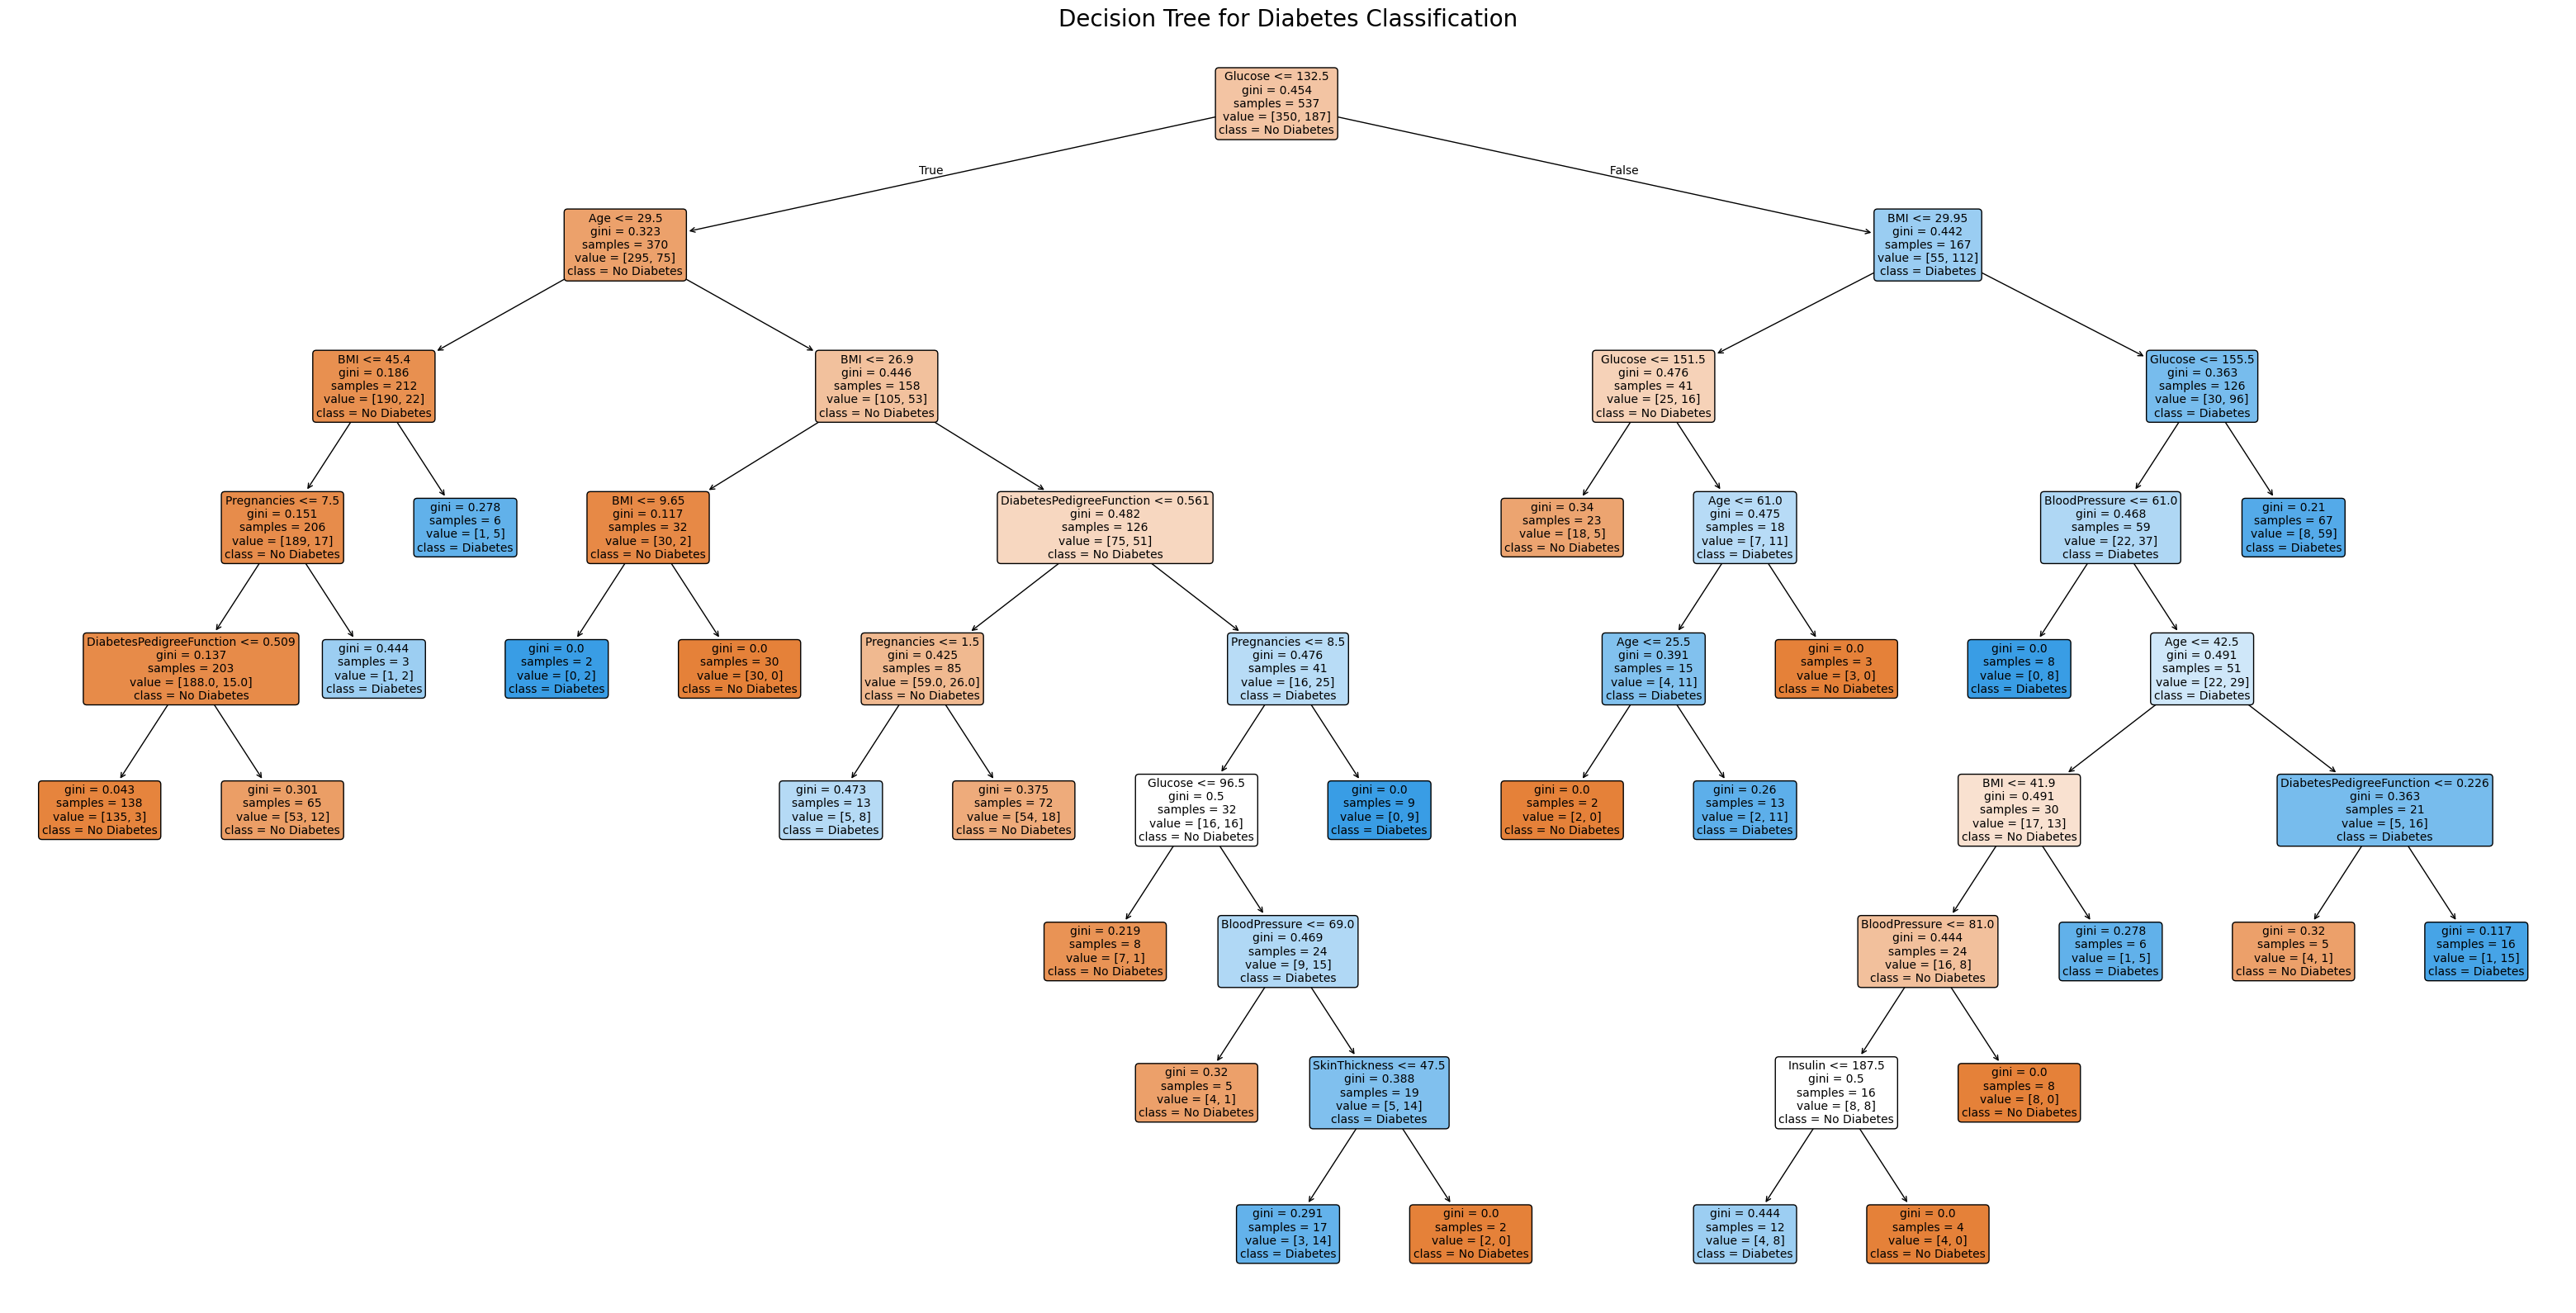

In [23]:
plt.figure(figsize=(40,20))

class_names = ['No Diabetes', 'Diabetes']

tree.plot_tree(
    DT_clf,
    feature_names=features_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree for Diabetes Classification", fontsize=20)
plt.show()


 10. Важность признаков (Decision Tree)

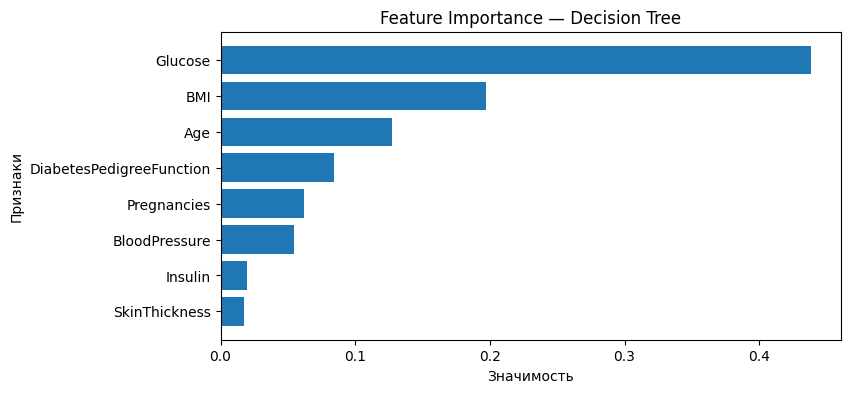

In [ ]:
feature_importance = DT_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,4))
plt.barh(features_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Значимость")
plt.ylabel("Признаки")
plt.title("Feature Importance — Decision Tree")
plt.show()


 11. Random Forest — Обучение модели

In [ ]:
n_estimators = 150
max_depth = 10

RF_clf = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    oob_score=True,
    random_state=42
)

RF_clf.fit(X_train, y_train)
y_predict = RF_clf.predict(X_test)


 12. Кросс-валидация (Random Forest)

In [ ]:
scores = cross_validate(
    RF_clf,
    X_train,
    y_train,
    scoring=scoring,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)

DF_cv = pd.DataFrame(scores)
display(DF_cv)

print("Средние метрики:")
print(DF_cv.mean()[2:])
print("OOB score:", RF_clf.oob_score_)


,fit_time,score_time,test_ACC (Точность),test_F1 (F1-мера),test_Precision (Точность),test_Recall (Полнота)
0,0.375043,0.018138,0.703704,0.699588,0.697462,0.703704
1,0.395688,0.021559,0.759259,0.746193,0.755090,0.759259
2,0.383601,0.019308,0.775701,0.770414,0.770489,0.775701
3,0.373263,0.019425,0.785047,0.768123,0.790894,0.785047
4,0.391798,0.019177,0.822430,0.820541,0.820058,0.822430


Средние метрики:
test_ACC (Точность)          0.769228
test_F1 (F1-мера)            0.760972
test_Precision (Точность)    0.766798
test_Recall (Полнота)        0.769228
dtype: float64
OOB score: 0.7653631284916201


🧾 13. Отчет классификации (Random Forest)

In [ ]:
print(classification_report(
    y_test,
    y_predict,
    target_names=class_names,
    zero_division=0
))


              precision    recall  f1-score   support

 No Diabetes       0.78      0.87      0.82       150
    Diabetes       0.69      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



📊 14. Важность признаков (Random Forest)

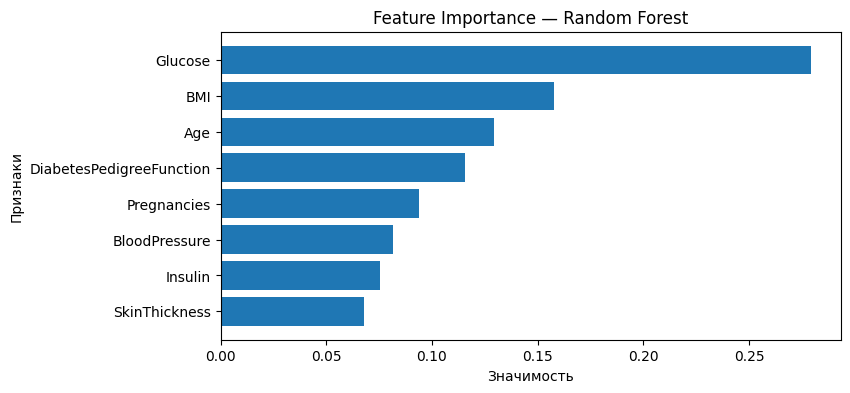

In [ ]:
feature_importance = RF_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,4))
plt.barh(features_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Значимость")
plt.ylabel("Признаки")
plt.title("Feature Importance — Random Forest")
plt.show()
